In [2]:
import math
import warnings
warnings.filterwarnings('ignore')

from IPython.display import YouTubeVideo
from linearmodels.panel import PanelOLS, RandomEffects
from linearmodels.panel.data import PanelData
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.stattools import durbin_watson

%matplotlib inline


In [3]:
df_hihs = pd.read_csv("Healthcare_Investments_and_Hospital_Stay.csv")

In [4]:
df_hihs.head()

,Location,Time,Hospital_Stay,MRI_Units,CT_Scanners,Hospital_Beds
0,AUS,1992,6.6,1.43,16.71,1.43
1,AUS,1994,6.4,2.36,18.48,2.36
2,AUS,1995,6.5,2.89,20.55,2.89
3,AUS,1996,6.4,2.96,21.95,2.96
4,AUS,1997,6.2,3.53,23.34,3.53


In [5]:
df_hihs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       518 non-null    object 
 1   Time           518 non-null    int64  
 2   Hospital_Stay  518 non-null    float64
 3   MRI_Units      518 non-null    float64
 4   CT_Scanners    518 non-null    float64
 5   Hospital_Beds  518 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 24.4+ KB


In [6]:
locations = set(df_hihs["Location"])
print(f"There are {len(locations)} countries data.\n")

print("The country breakdown is as follows:")
print(locations)

There are 32 countries data.

The country breakdown is as follows:
{'KOR', 'EST', 'IRL', 'NLD', 'GRC', 'BEL', 'HUN', 'DEU', 'TUR', 'DNK', 'LUX', 'RUS', 'FRA', 'SVN', 'ISL', 'CZE', 'NZL', 'ISR', 'AUS', 'USA', 'ESP', 'LTU', 'CAN', 'PRT', 'ITA', 'LVA', 'FIN', 'AUT', 'JPN', 'GBR', 'SVK', 'POL'}


Text(0.5, 1.0, 'records for each location')

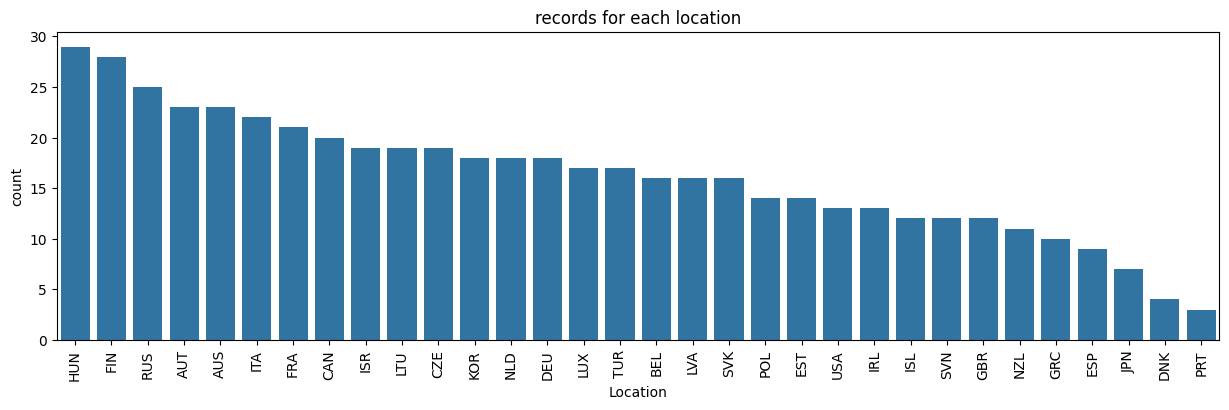

In [7]:
fig = plt.figure(figsize=(15, 4))
g = sns.countplot(data=df_hihs, x='Location',
                  order = df_hihs['Location'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("records for each location")

In [8]:
print(f'Minimum year: {min(df_hihs["Time"])}')
print(f'Maximum year: {max(df_hihs["Time"])}')

Minimum year: 1990
Maximum year: 2018



The indicator I mentioned above. It is generally measured by dividing the total 
number of days stayed by all inpatients during a year by the number of admissions or discharges.
Day cases are excluded. The indicator is presented both for all acute 
care cases and for childbirth without complications.

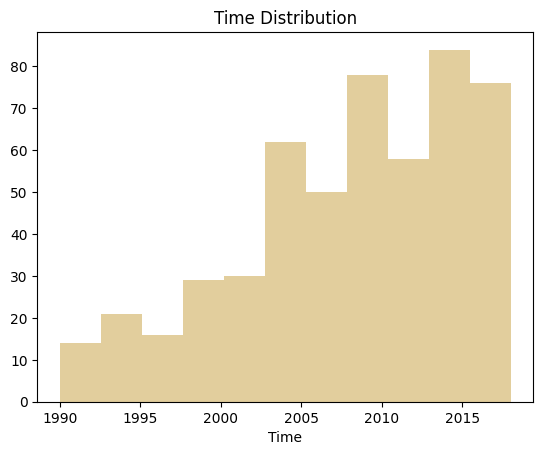

In [19]:
from IPython.display import display, Markdown
g = sns.distplot(df_hihs["Time"], kde=False, rug=False, color="darkgoldenrod")
g.set_title("Time Distribution")

display(Markdown("""
The indicator I mentioned above. It is generally measured by dividing the total 
number of days stayed by all inpatients during a year by the number of admissions or discharges.
Day cases are excluded. The indicator is presented both for all acute 
care cases and for childbirth without complications."""))


MRI_Units

This indicator is measured in the numbers of equipment per 1,000,000 inhabitants.
I've also included a reference video in case anyone is not familiar with MRI.


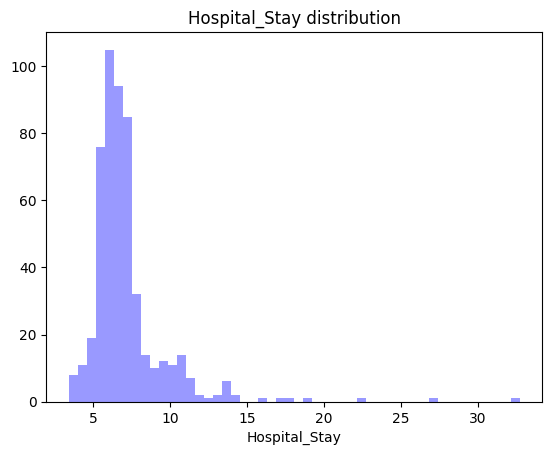

In [18]:
g = sns.distplot(df_hihs["Hospital_Stay"], kde=False, rug=False, color="b")
g.set_title("Hospital_Stay distribution")

display(Markdown("""
MRI_Units

This indicator is measured in the numbers of equipment per 1,000,000 inhabitants.
I've also included a reference video in case anyone is not familiar with MRI.
"""))


CT Scanners

This indicator is measured in the numbers of equipment per 1,000,000 inhabitants.
I also included a reference video for CT scanner.


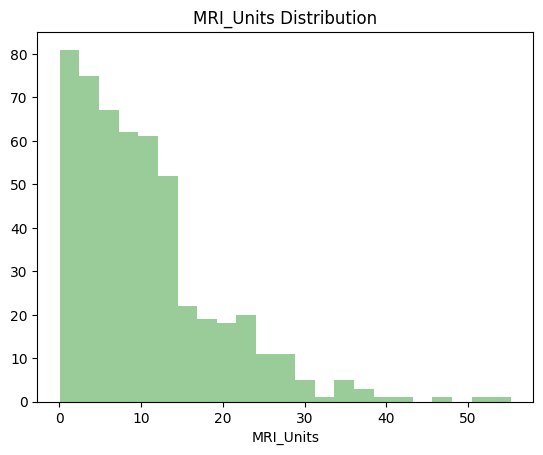

In [23]:
g = sns.distplot(df_hihs["MRI_Units"], kde=False, rug=False, color="g")
g.set_title("MRI_Units Distribution")

display(Markdown("""
CT Scanners

This indicator is measured in the numbers of equipment per 1,000,000 inhabitants.
I also included a reference video for CT scanner.
"""))


Hospital Beds

The indicator is presented as a total and for curative care and psychiatric care. It is measured in number of beds per 1,000 inhabitants.


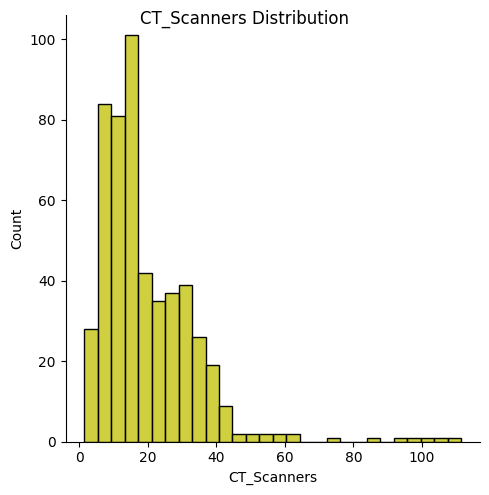

In [30]:
g = sns.displot(df_hihs["CT_Scanners"], kde=False, rug=False, color='y')
g.fig.suptitle("CT_Scanners Distribution", fontsize=12)

display(Markdown("""
Hospital Beds

The indicator is presented as a total and for curative care and psychiatric care. It is measured in number of beds per 1,000 inhabitants.
"""))


Text(0.5, 1.0, 'Hospital_Beds Distribution')

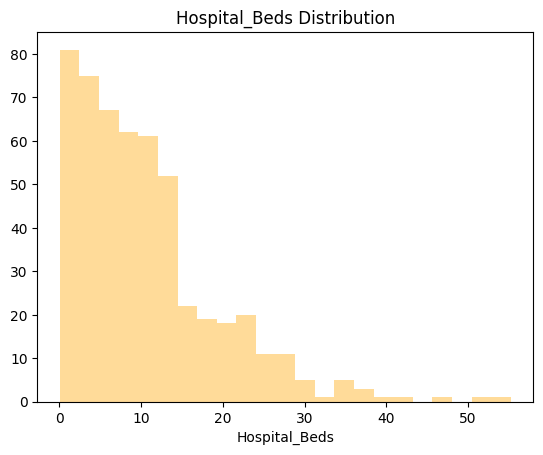

In [31]:
g = sns.distplot(df_hihs["Hospital_Beds"], kde=False, rug=False, color="orange")
g.set_title("Hospital_Beds Distribution")



Text(0.5, 1.0, 'Correlation matrix for each indicator')

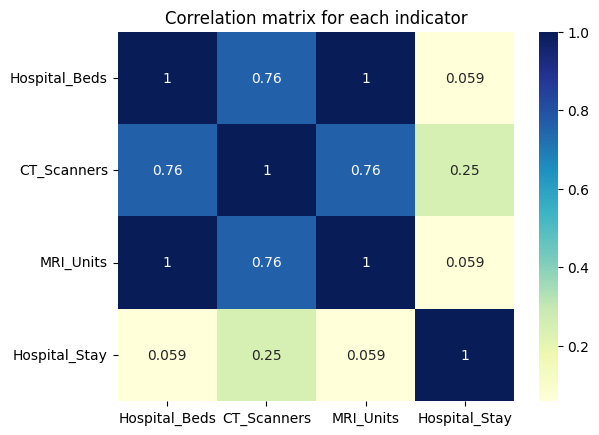

In [32]:
g = sns.heatmap(df_hihs[["Hospital_Beds", "CT_Scanners", "MRI_Units", "Hospital_Stay"]].corr(),
                annot=True, cmap="YlGnBu")
g.set_title("Correlation matrix for each indicator")

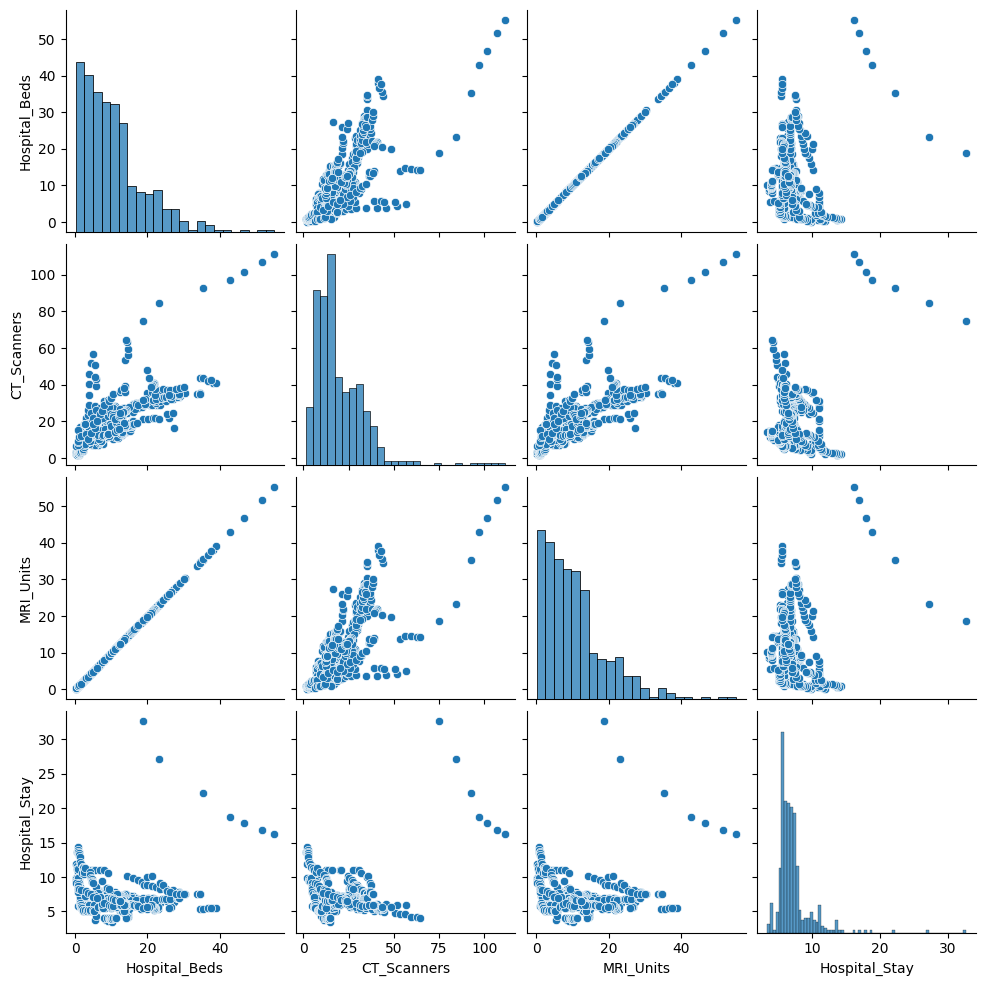

In [33]:
g = sns.pairplot(df_hihs[["Hospital_Beds", "CT_Scanners", "MRI_Units", "Hospital_Stay"]])

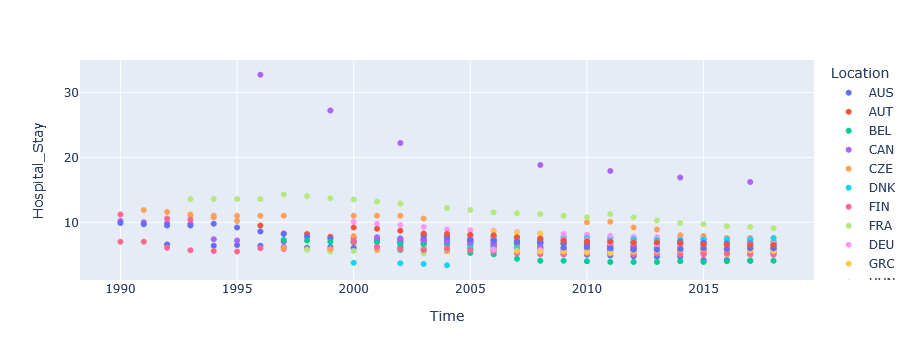

In [34]:
fig = px.scatter(df_hihs, x="Time", y="Hospital_Stay", color="Location", hover_data=["Time", "Location"])
fig.show()

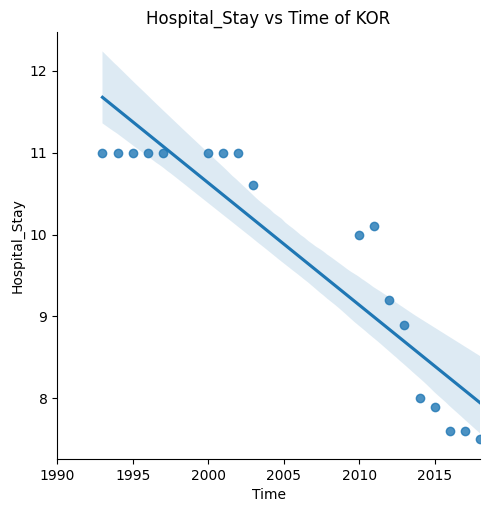

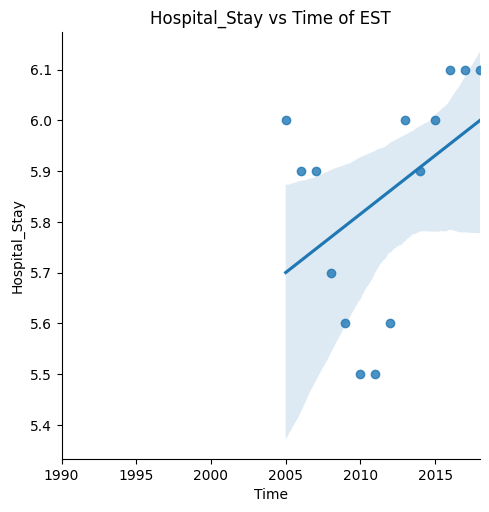

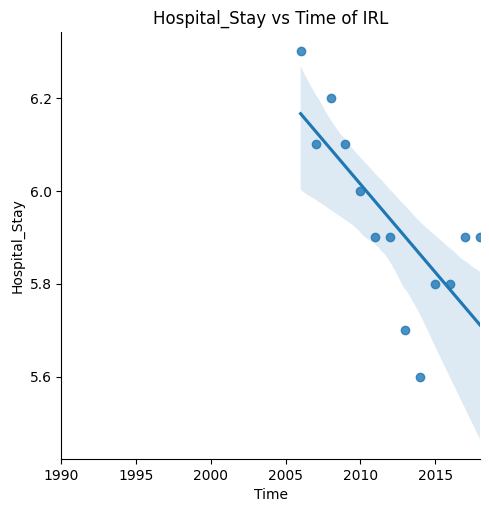

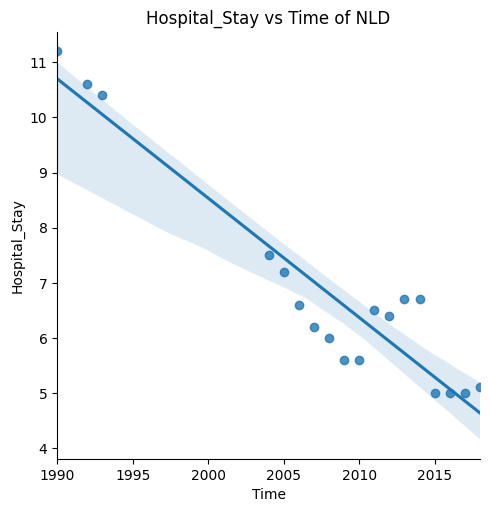

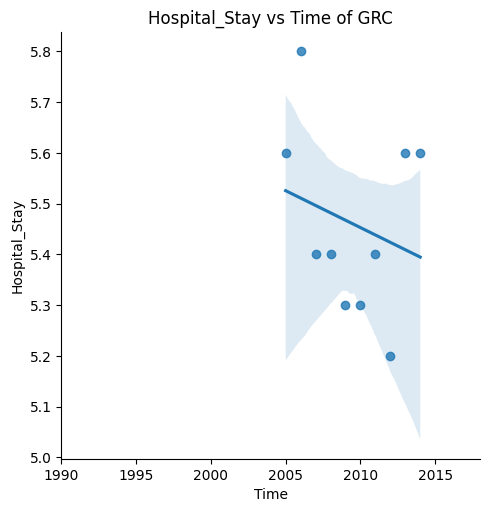

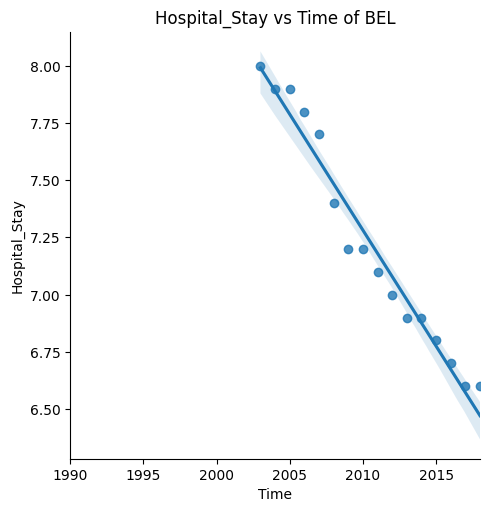

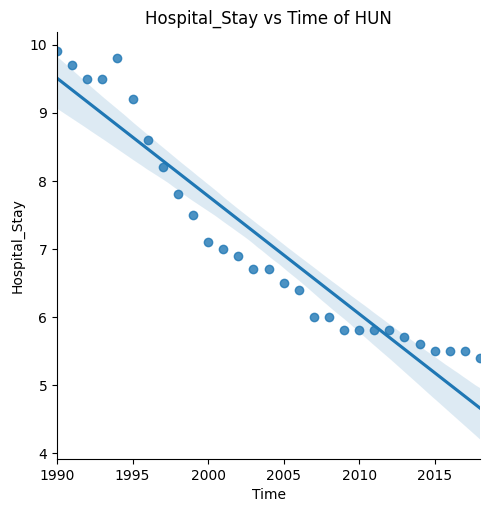

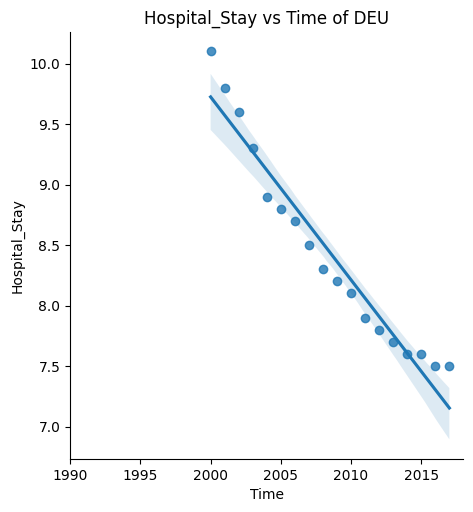

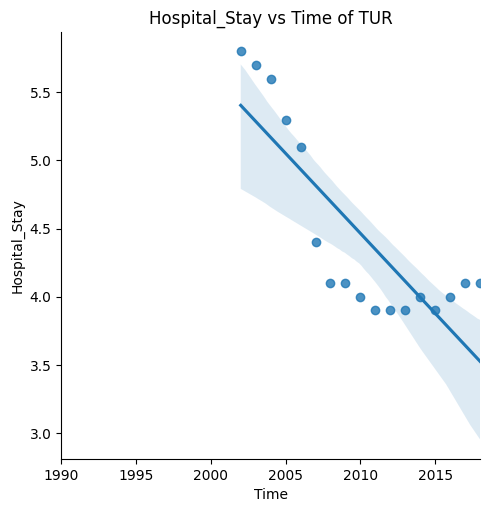

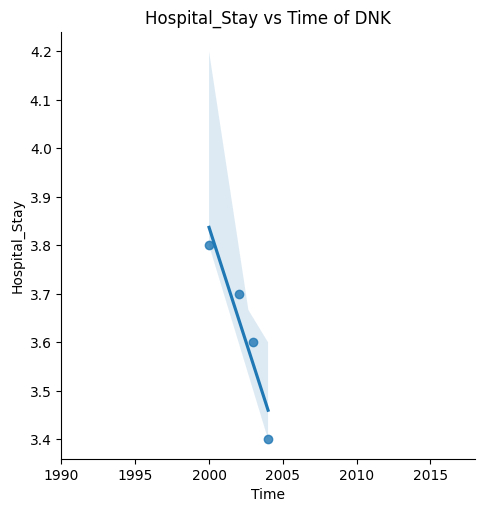

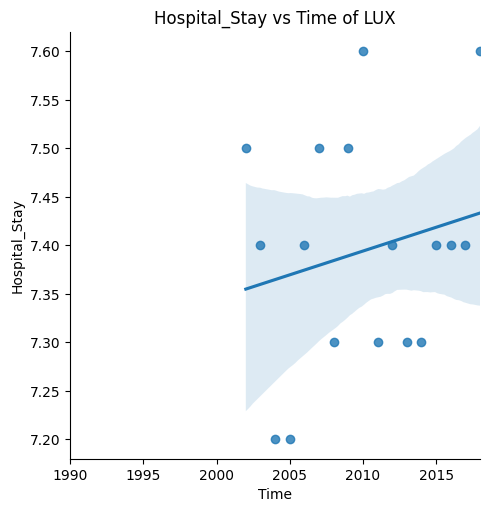

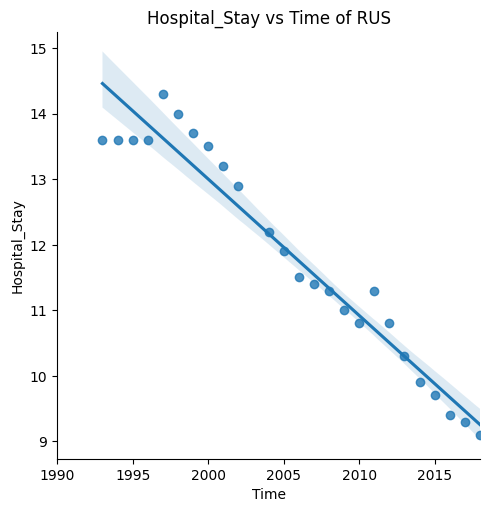

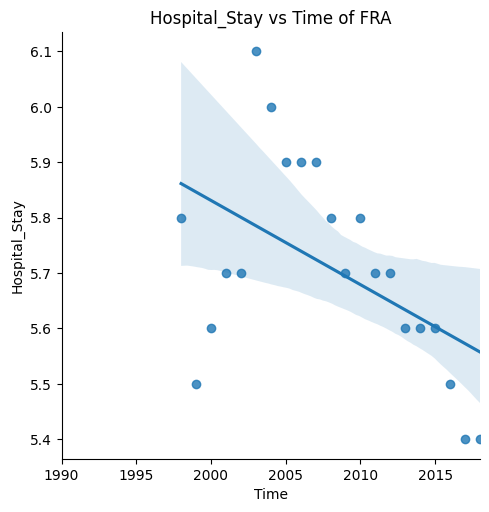

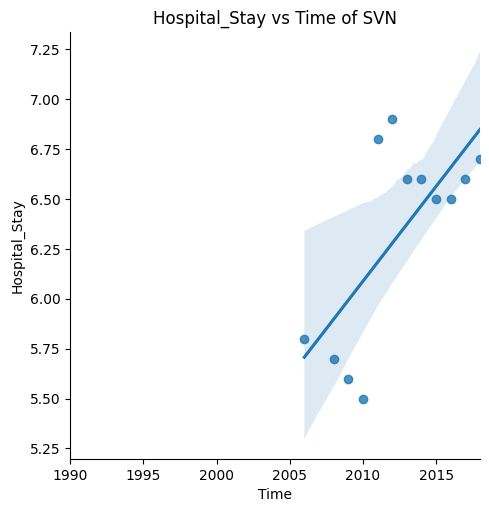

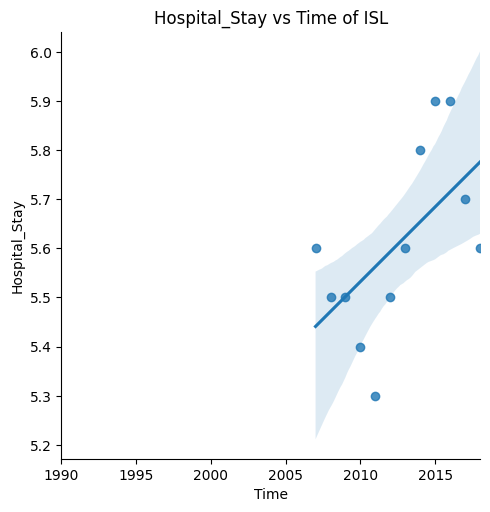

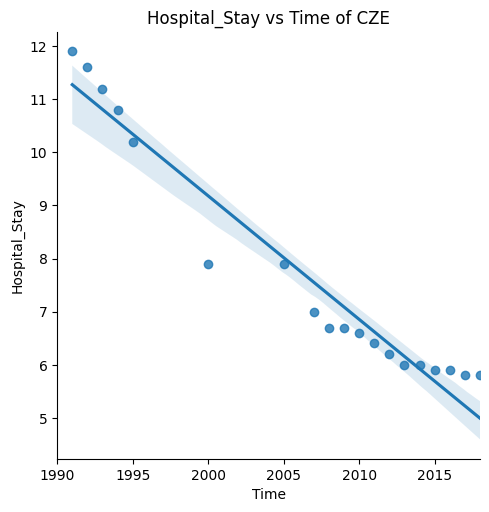

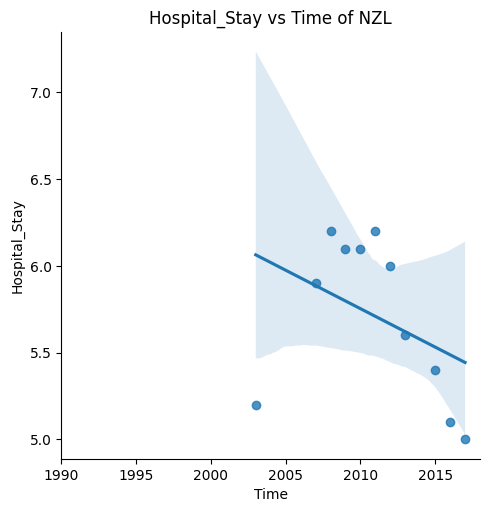

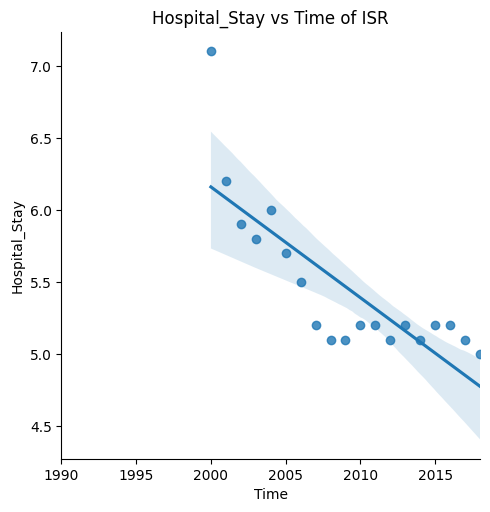

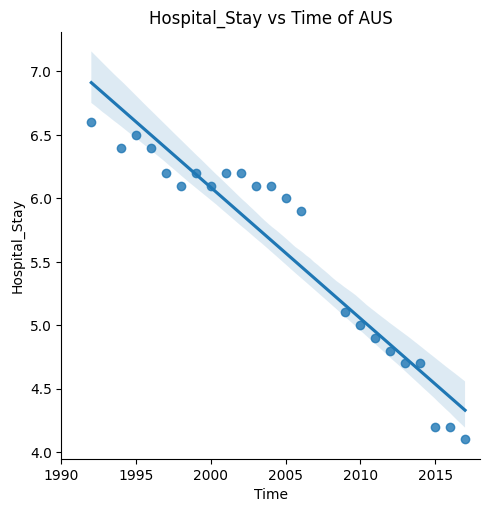

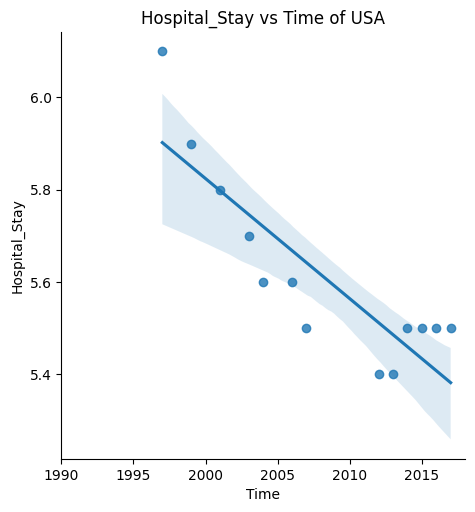

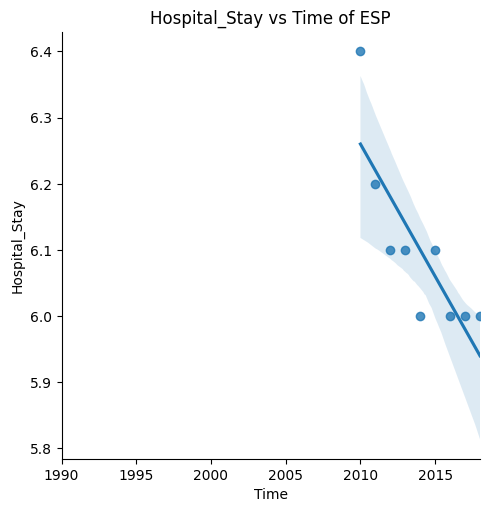

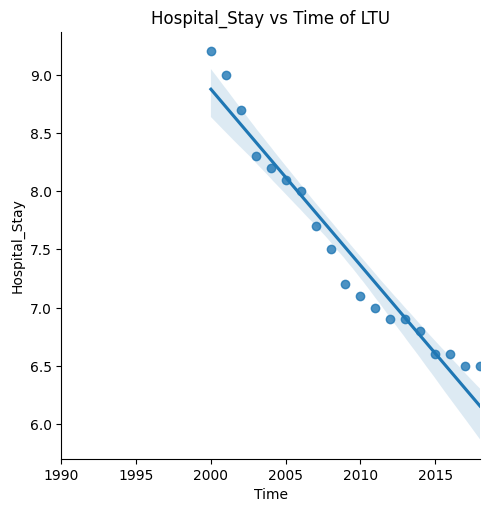

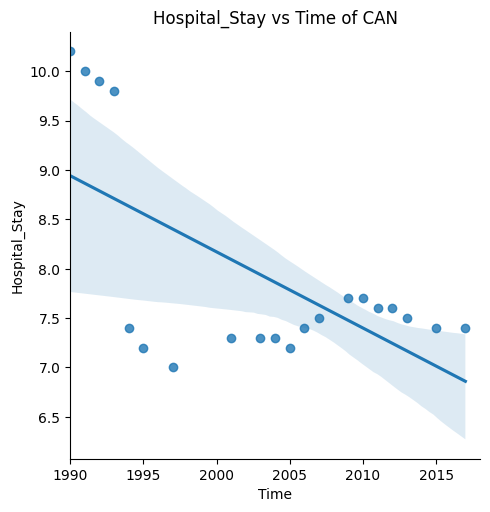

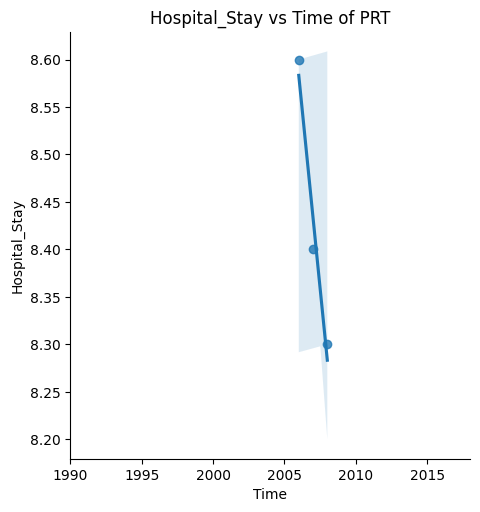

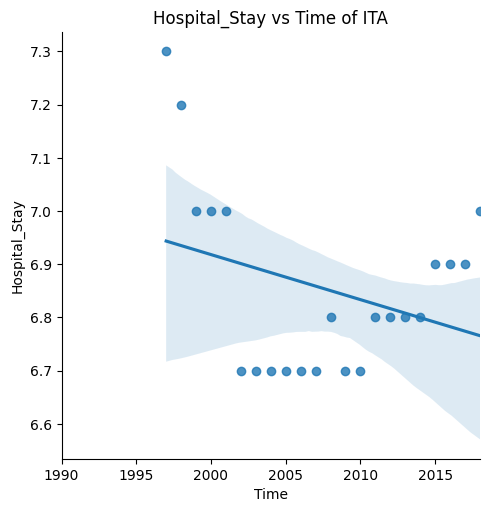

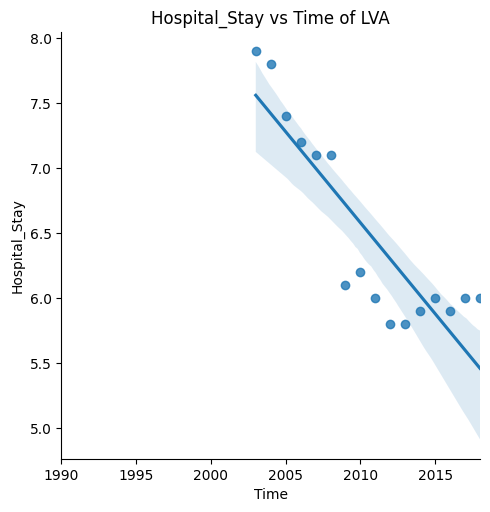

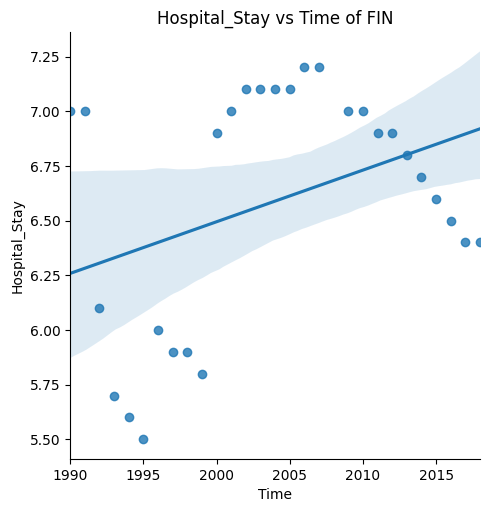

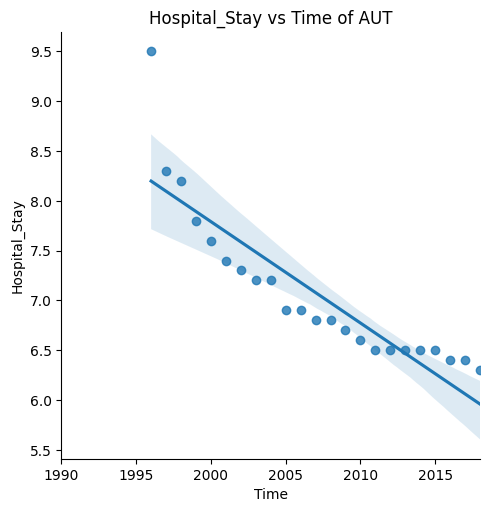

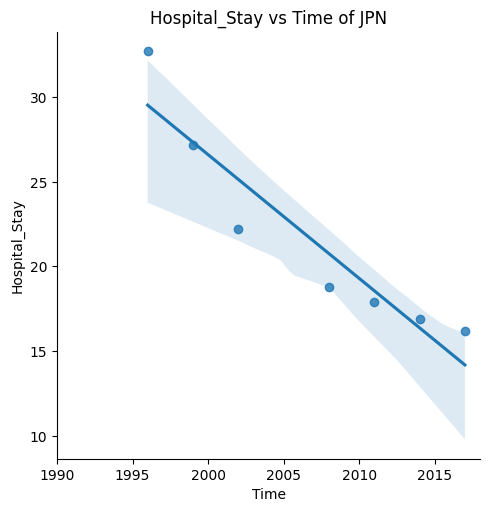

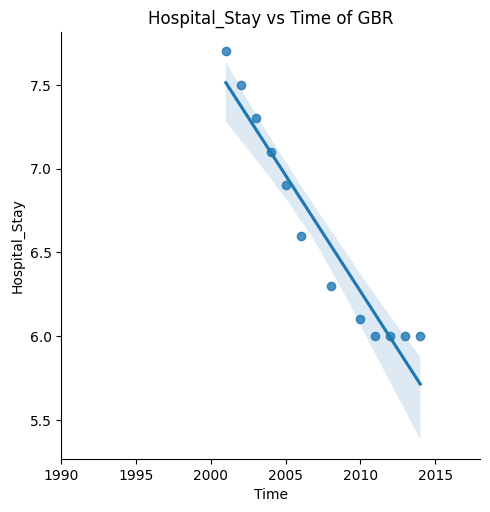

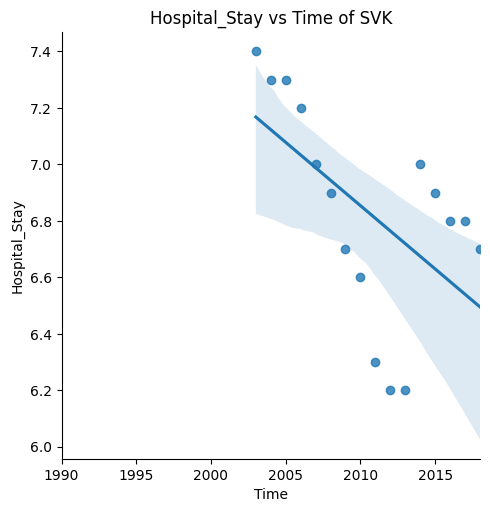

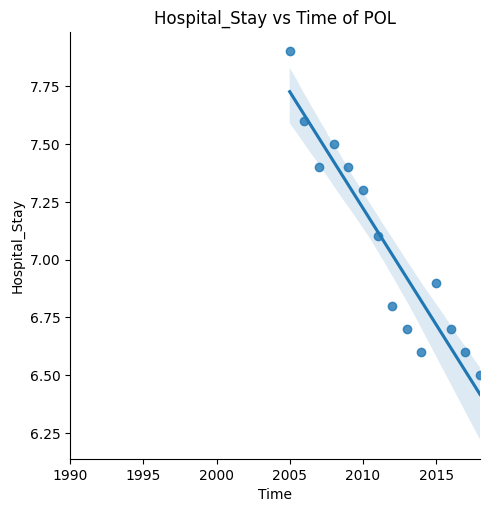

In [36]:
for loc in locations:
    df_hihs_tmp = df_hihs[df_hihs["Location"]==loc]
    sns.lmplot(x="Time", y="Hospital_Stay", data=df_hihs_tmp).set(xlim=(1990, 2018))
    ax = plt.gca()
    ax.set_title(f"Hospital_Stay vs Time of {loc}")

In [38]:
df_hihs_log = df_hihs.copy()
df_hihs_log["Hospital_Stay"] = df_hihs_log["Hospital_Stay"].map(lambda x: math.log(x))

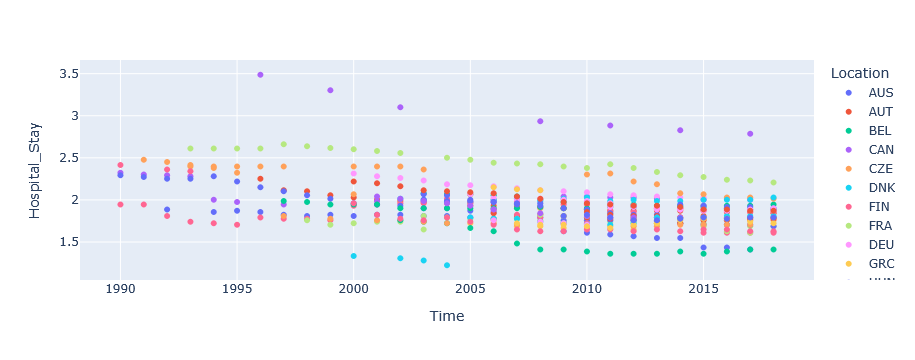

In [39]:
fig = px.scatter(df_hihs_log, x="Time", y="Hospital_Stay", color="Location", hover_data=['Time', "Location"])
fig.show()

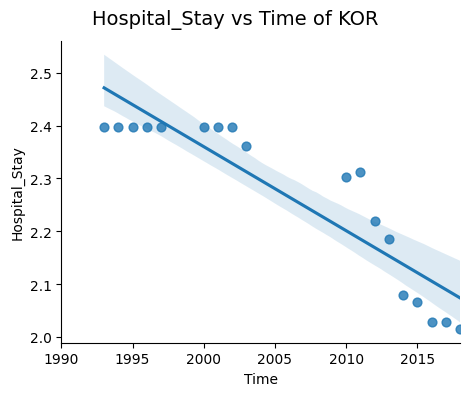

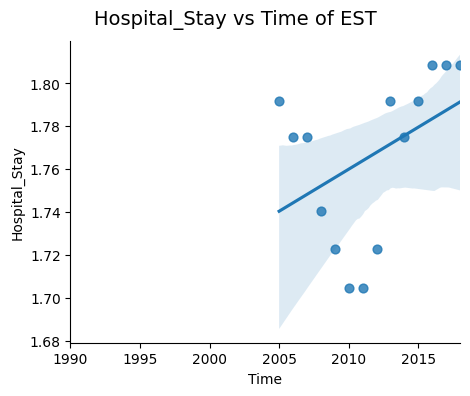

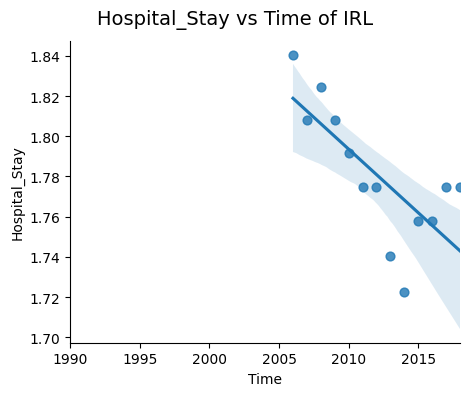

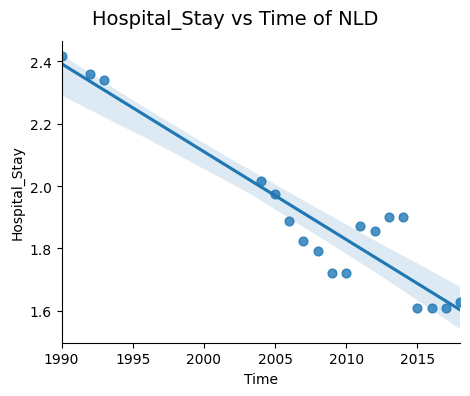

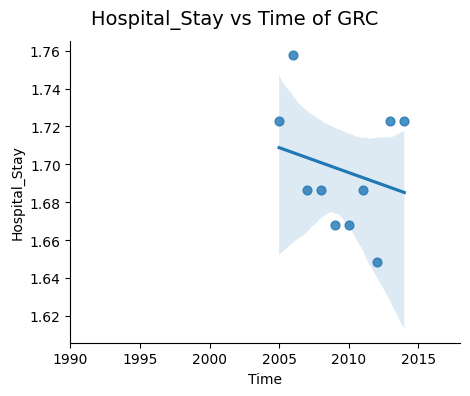

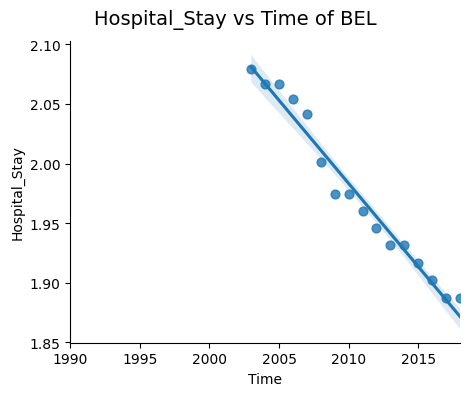

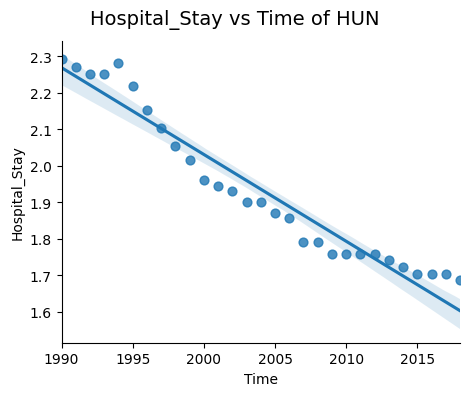

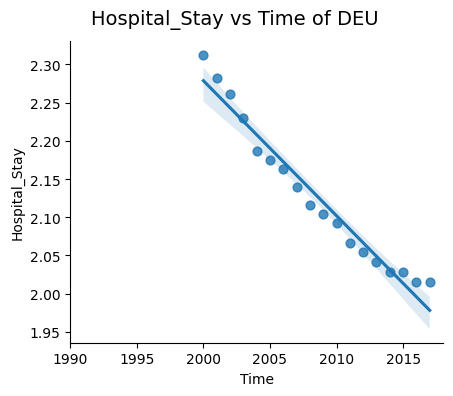

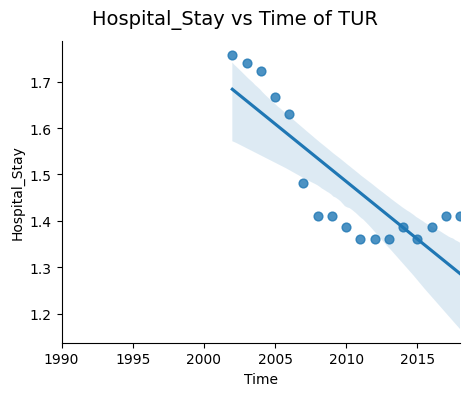

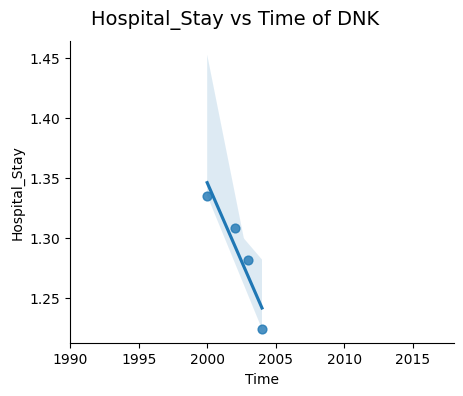

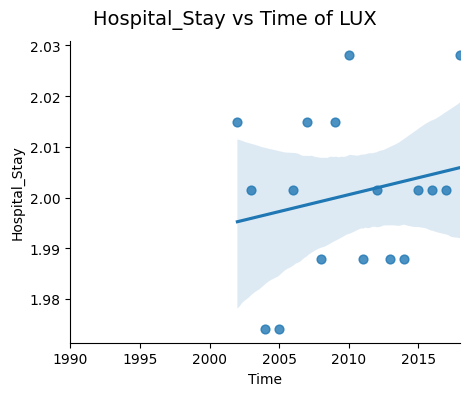

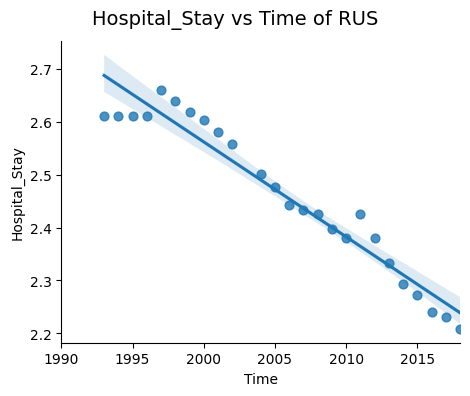

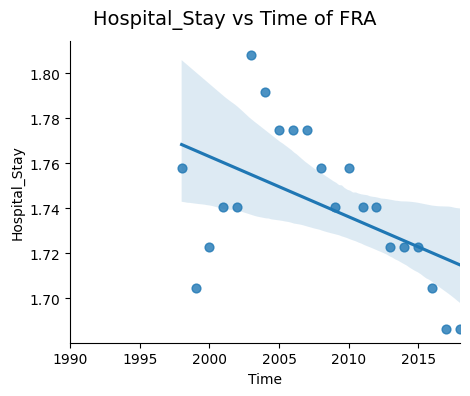

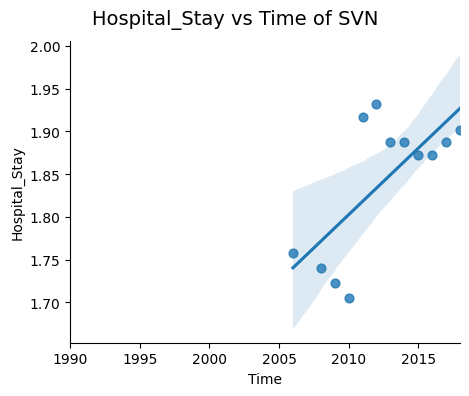

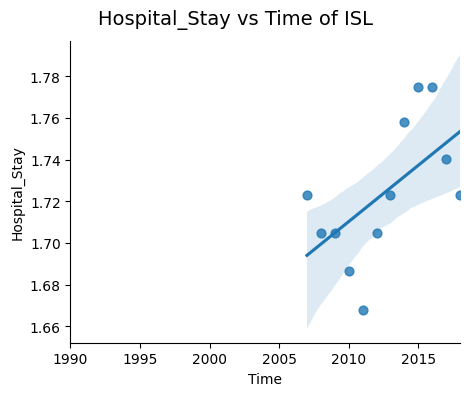

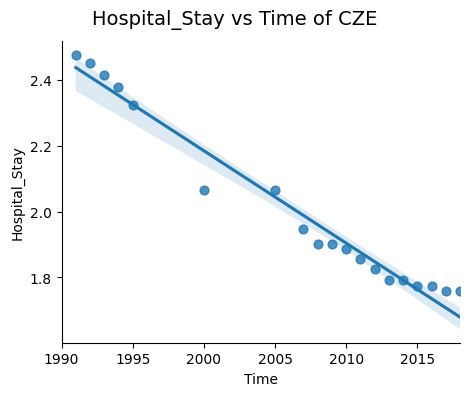

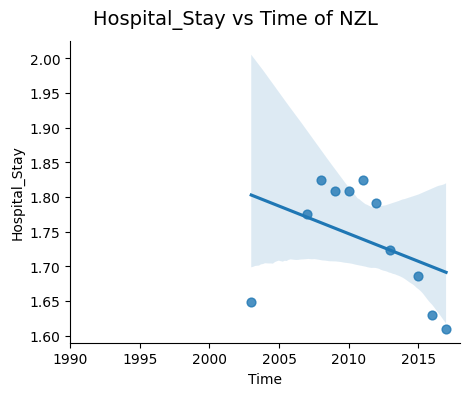

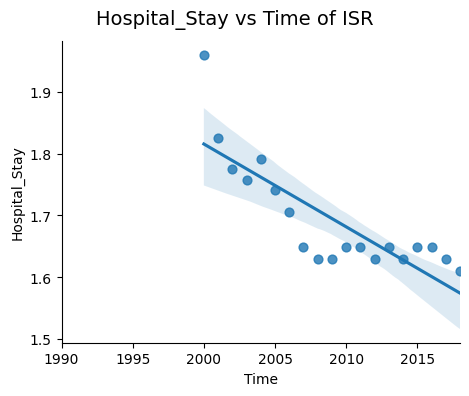

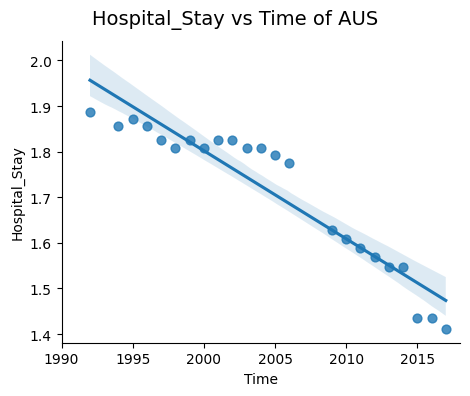

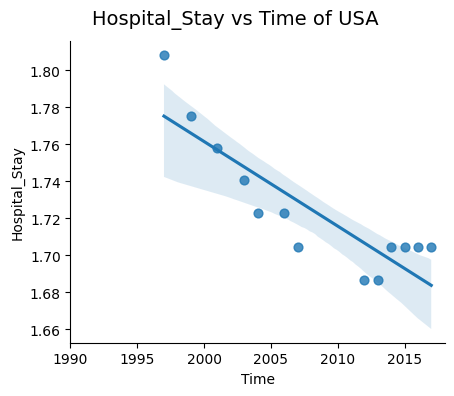

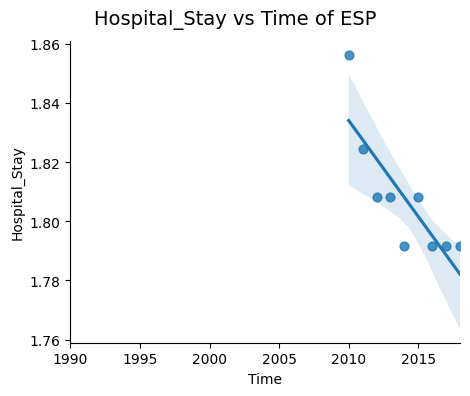

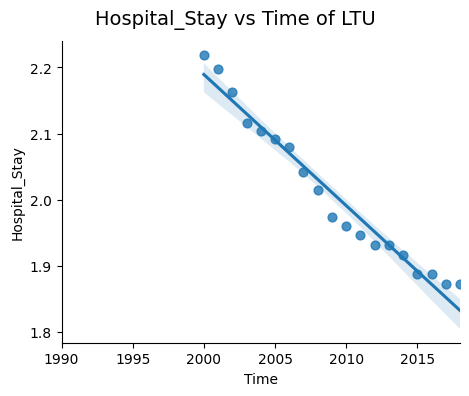

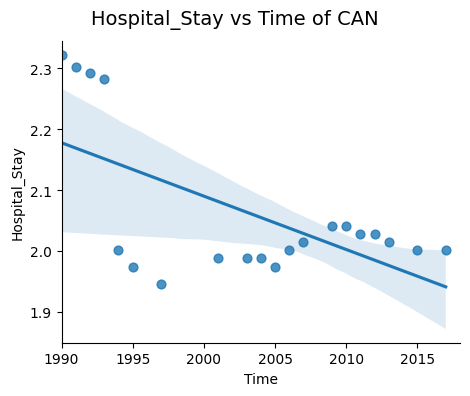

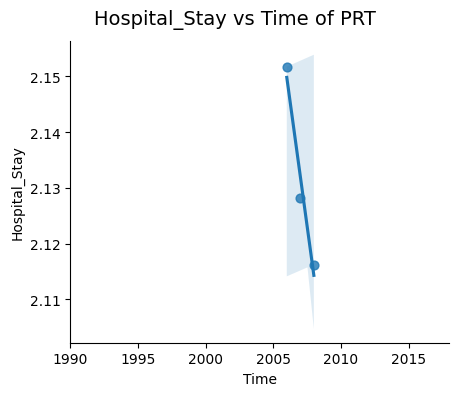

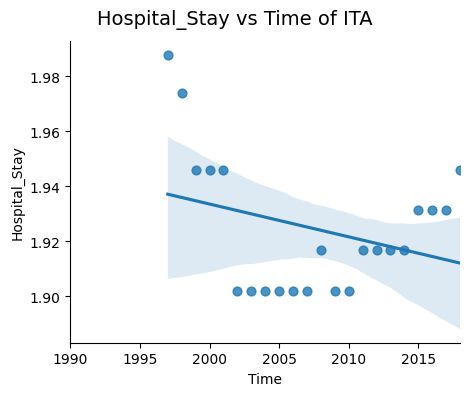

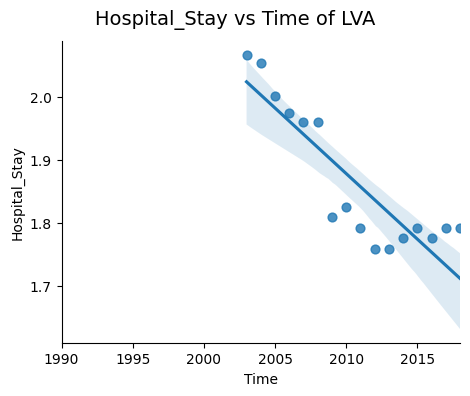

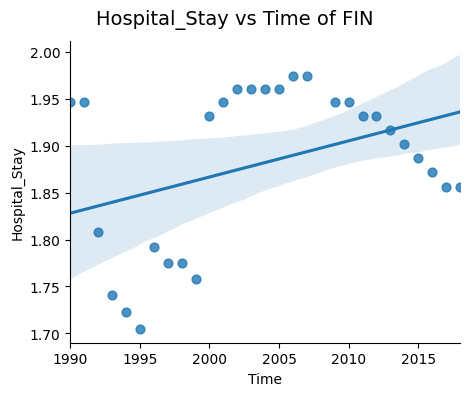

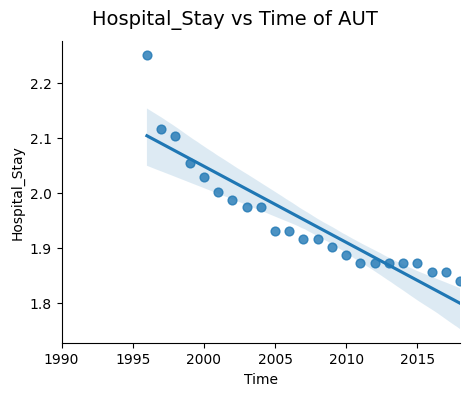

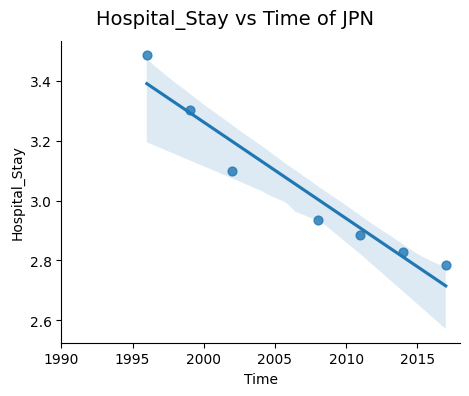

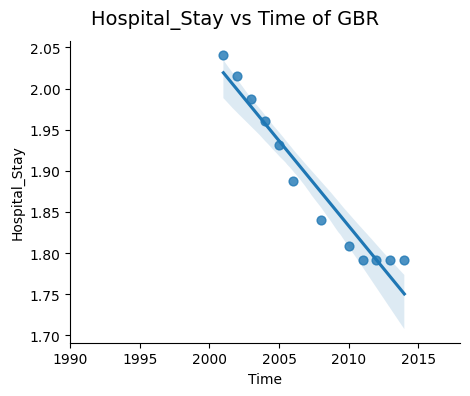

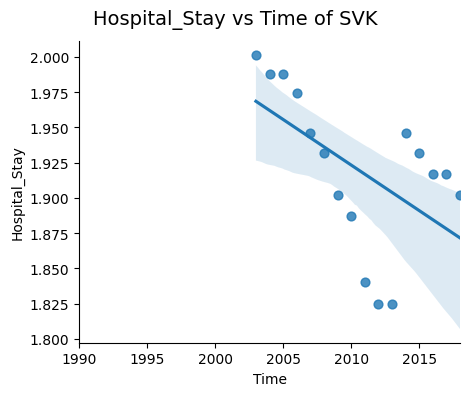

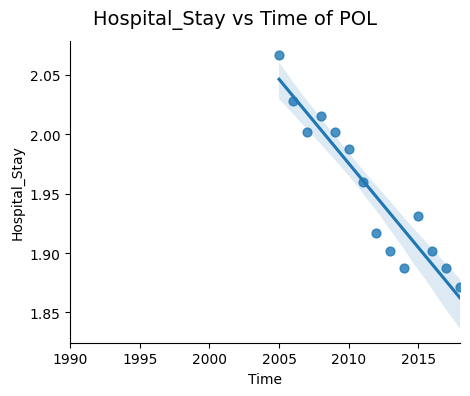

In [42]:
for loc in locations:
    df_hihs_tmp = df_hihs_log[df_hihs_log["Location"] == loc]
    g = sns.lmplot(
        x='Time',
        y='Hospital_Stay',
        data=df_hihs_tmp,
        height=4,
        aspect=1.2,
        scatter_kws={'s': 40}
    )
    g.set(xlim=(1990, 2018))
    g.fig.suptitle(f"Hospital_Stay vs Time of {loc}", fontsize=14)
    g.fig.subplots_adjust(top=0.9)

In [43]:
Location = pd.Categorical(df_hihs_log.Location)
df_hihs_log = df_hihs_log.set_index(['Location', 'Time'])

In [44]:
df_hihs_log

Hospital_Stay  MRI_Units  CT_Scanners  Hospital_Beds
Location Time                                                      
AUS      1992       1.887070       1.43        16.71           1.43
         1994       1.856298       2.36        18.48           2.36
         1995       1.871802       2.89        20.55           2.89
         1996       1.856298       2.96        21.95           2.96
         1997       1.824549       3.53        23.34           3.53
...                      ...        ...          ...            ...
LTU      2014       1.916923      10.57        22.17          10.57
         2015       1.887070      11.02        21.00          11.02
         2016       1.887070      12.20        23.01          12.20
         2017       1.871802      12.37        23.33          12.37
         2018       1.871802      12.49        24.27          12.49

[518 rows x 4 columns]

In [52]:
formula_fe = 'Hospital_Stay ~ CT_Scanners + Hospital_Beds + EntityEffects'
mod_fe = PanelOLS.from_formula(formula_fe, data=df_hihs_log)
result_fe = mod_fe.fit()

print(result_fe.summary)


                          PanelOLS Estimation Summary                           
Dep. Variable:          Hospital_Stay   R-squared:                        0.3533
Estimator:                   PanelOLS   R-squared (Between):             -0.3179
No. Observations:                 518   R-squared (Within):               0.3533
Date:                Wed, Jul 02 2025   R-squared (Overall):             -0.2756
Time:                        20:39:51   Log-likelihood                    464.50
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      132.21
Entities:                          32   P-value                           0.0000
Avg Obs:                       16.188   Distribution:                   F(2,484)
Min Obs:                       3.0000                                           
Max Obs:                       29.000   F-statistic (robust):             132.21
                            

In [53]:
durbin_watson(result_fe.resids)

np.float64(0.3763175672129866)

In [55]:
exog_vars = ['CT_Scanners', 'Hospital_Beds']
exog = sm.add_constant(df_hihs_log[exog_vars])
mod_ra = RandomEffects(df_hihs_log.Hospital_Stay, exog)
result_ra = mod_ra.fit()

In [56]:
print(result_ra)

                        RandomEffects Estimation Summary                        
Dep. Variable:          Hospital_Stay   R-squared:                        0.3380
Estimator:              RandomEffects   R-squared (Between):             -0.8574
No. Observations:                 518   R-squared (Within):               0.3459
Date:                Wed, Jul 02 2025   R-squared (Overall):             -0.3973
Time:                        20:44:35   Log-likelihood                    422.66
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      131.50
Entities:                          32   P-value                           0.0000
Avg Obs:                       16.188   Distribution:                   F(2,515)
Min Obs:                       3.0000                                           
Max Obs:                       29.000   F-statistic (robust):             100.63
                            

In [57]:
durbin_watson(result_ra.resids)

np.float64(0.34640183696553445)